# Personal Loan Acceptance Analytics - Data Preparation

## Overview
This notebook is used to prepare the data for the Personal Loan Acceptance Analytics project. The data is prepared by:

1. Loading the data from the source file
2. Cleaning the data    


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Set the working directory ...
main_path = f'{os.getcwd()}/../'
# Set the dataset path ...
dataset_path = f'{main_path}/data/UniversalBank.csv'
# Load the dataset ...
df = pd.read_csv(dataset_path)
# Print the first 5 rows of the dataframe ...
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
print('Global Dataframe Information:')
df.info()
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'This dataset has {df.isnull().sum().sum()} missing values')

Global Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
This dataset has 5000 rows and 14 columns


In [8]:
print('Dataframe Summary Statistics:')
df.describe()

Dataframe Summary Statistics:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Data Source
The data is sourced from the website of the book "Data Mining for Business Analytics" by Galit Shmueli, Peter C. Bruce, Inbal Yahav, Nitin R. Patel, Kenneth C. Lichtendahl Jr. The dataset provides information on 5,000 customers of a bank. The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).

in our case the target variable is Personal Loan which is a binary variable with 1 meaning that the customer accepted the personal loan offered to him and 0 meaning that the customer refused the personal loan offered to him.

### Data Visualisation ...

In [9]:
# scaling numirical features ...
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']] = scaler.fit_transform(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

#### Univariate Analysis

let's start by looking at the distribution of the target variable (Personal Loan) and the other variables in the dataset.

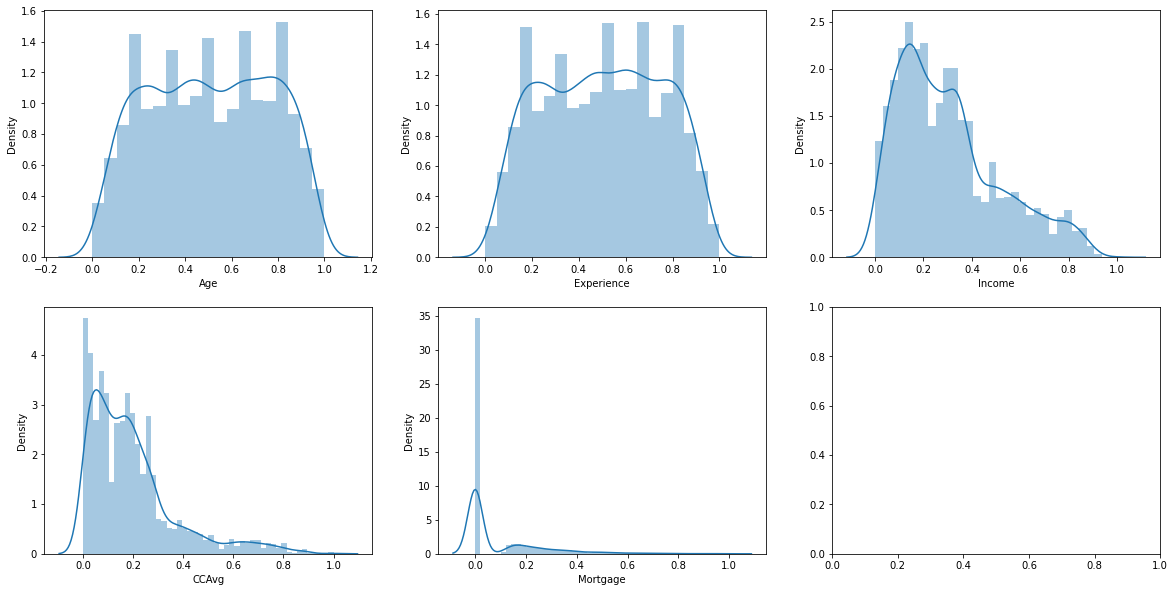

In [22]:
# visualizing the distribution of the numerical features ...
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.distplot(df['Age'], ax=ax[0, 0])
sns.distplot(df['Experience'], ax=ax[0, 1])
sns.distplot(df['Income'], ax=ax[0, 2])
sns.distplot(df['CCAvg'], ax=ax[1, 0])
sns.distplot(df['Mortgage'], ax=ax[1, 1])
plt.show()


##### Target Variable (Personal Loan)

The target variable is a binary variable with 1 meaning that the customer accepted the personal loan offered to him and 0 meaning that the customer refused the personal loan offered to him. let's look at the distribution of the target variable.

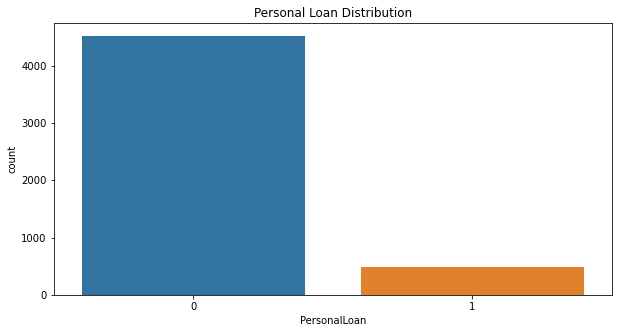

In [23]:
# visualizing the distribution of the target variable ...
plt.figure(figsize=(10, 5))
sns.countplot(df['PersonalLoan'])
# display percentage of each class ...
plt.title('Personal Loan Distribution')
plt.show()

## Bivariate Analysis

let's look at the relationship between the target variable and the other variables in the dataset.

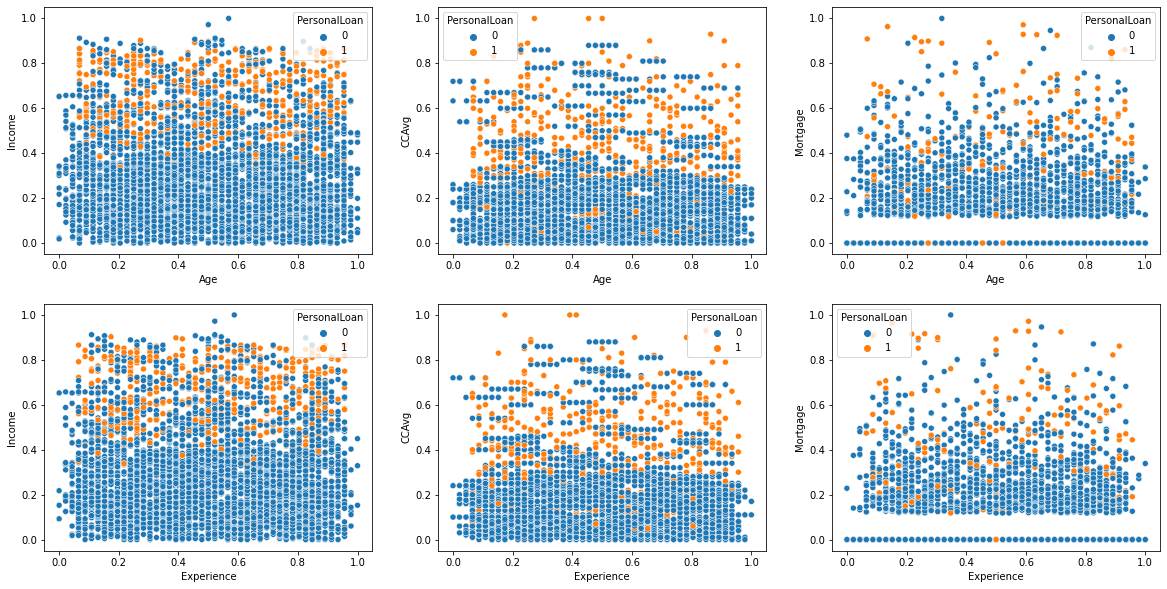

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.scatterplot(x='Age', y='Income', hue='PersonalLoan', data=df, ax=ax[0, 0])
sns.scatterplot(x='Age', y='CCAvg', hue='PersonalLoan', data=df, ax=ax[0, 1])
sns.scatterplot(x='Age', y='Mortgage', hue='PersonalLoan', data=df, ax=ax[0, 2])
sns.scatterplot(x='Experience', y='Income', hue='PersonalLoan', data=df, ax=ax[1, 0])
sns.scatterplot(x='Experience', y='CCAvg', hue='PersonalLoan', data=df, ax=ax[1, 1])
sns.scatterplot(x='Experience', y='Mortgage', hue='PersonalLoan', data=df, ax=ax[1, 2])
plt.show()

by looking making a bi-variate analysis between the target variable and the other variables in the dataset we can see that the following variables have a strong relationship with the target variable:

1. Income
2. CCAvg
3. Education
4. Family
5. CD Account
6. Mortgage

### Correlation Matrix

let's look at the correlation matrix between the target variable and the other variables in the dataset.

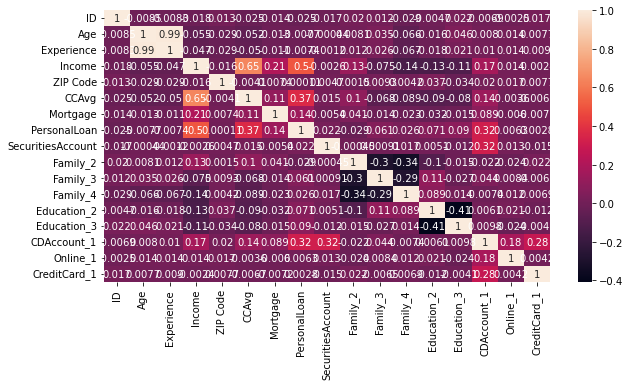

In [27]:
# visualizing the correlation between the numerical features ...
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()